In [87]:
# TODO: First test all code methods using one dimensional dimensions first
    # A simple recommended test is to set the feature matrix equal to identity matrix - then the model should give MSE = 0
    # Then test with the Franke fcn mentioned in the notes



# Part a: Ordinary Least Squares on the Franke function
## Create a data set, scale the data (e.g. subtracting mean values) and split into training and test sets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
#Classes
class DataHandler:
    
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._featureMatrix = 0
        self._beta = 0
        self._X_train = 0
        self._X_test = 0
        self._y_train = 0
        self._y_test = 0
        self._y_tilde = 0
        self._y_predict = 0

    #TODO: Should really ensure feature matrix has actually been created by this point
    def Get_beta(self):
        return self._beta
    
    def Get_predictions(self):
        return self._X_train, self._X_test, self._y_tilde, self._y_predict
        
    def CreateFeatureMatrix(self, degree):
        poly = PolynomialFeatures(degree, include_bias=True)
        poly_features = poly.fit_transform(self._x.reshape(-1, 1))
        poly.fit(poly_features, self._y)

        self._featureMatrix = poly_features

        return poly_features
    
    #TODO: Does too much - split it 
    def OrdinaryLeastSquaresMSE(self):
        X_train, X_test, y_train, y_test = train_test_split(self._featureMatrix, self._y, test_size=0.2)

        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #Pseudo inverse to handle singular matrices
        self._beta = beta

        #Make the prediction
        ytilde = X_train @ beta
        ypredict = X_test @ beta

        self._X_train = X_train
        self._X_test = X_test
        self._y_tilde = ytilde
        self._y_predict = ypredict
        self._y_train = y_train
        self._y_test = y_test

        mse_training = error.mean_squared_error(y_train, ytilde)
        mse_test = error.mean_squared_error(y_test, ypredict)

        return (mse_training, mse_test)
    
    #TODO: Be consistent with case use
    def R2ScoreFunction(self):
        r2_training = error.r2_score(self._y_train, self._y_tilde)
        r2_test = error.r2_score(self._y_test, self._y_predict)

        return r2_training, r2_test
    
    def Beta_ridge_regression(self, lmbd): 
        X_ridge = self._X_train
        y_ridge = self._y_train

        I = np.identity(100)
        
        return np.linalg.inv(X_ridge.T.dot(X_ridge) + lmbd @ I) @ X_ridge.T.dot(y_ridge)
    
    def Create_test_plot(self, degree):
        test_feature = self._featureMatrix
        test_beta = self._beta

        y_fit = test_feature @ test_beta

        # Plot
        plt.plot(self._x, self._y, 'bo', label = 'Data Points')
        plt.plot(self._x, y_fit, 'r-', label = f'Fitted Line (Degree {degree})')

        plt.title('Original Data with Fitted Line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def OLS_MSE_works_as_expected(self):
        X_identity = np.identity(100)
        actual_feature_matrix = self._featureMatrix 
        self._featureMatrix = X_identity
        
        ols_training_mse, ols_test_mse = self.OrdinaryLeastSquaresMSE()

        self._featureMatrix = actual_feature_matrix
        
        if ols_training_mse == 0:
            return True
        else:
            raise Exception("MSE on training data is not zero. Most likely some error in calculation logic. ols_training_mse value: ", ols_training_mse)


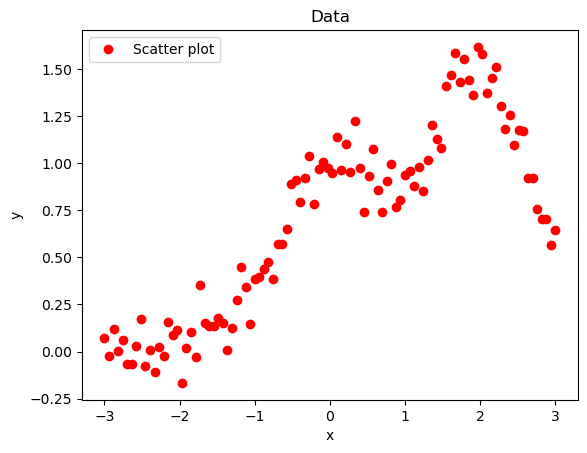

In [3]:
# Make data set
np.random.seed()
n = 100

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Simple_test_data = DataHandler(x, y)

##Plot the scatter
plt.figure()
plt.title("Data")
plt.plot(x, y, 'ro', label = 'Scatter plot')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## Present a critical discussion of how/why you have scaled the data
Assumption: Subtracting the mean value centres the data around zero - large/small values won't be as affected by the different regression models. For a larger deviation from zero, it might have been necessary to scale values down, but here the y-values are all within +-1 so that won't be necessary.

## Perform ordinary least squares analysis using polynomials x and y up to fifth order

## Evaluate MSE and R2

### Plot the MSE and R2 values as functions of degree - plot also the params beta as you increase the order

y_max:  1.5825255618731855
y_min:  -0.21617454767744823
y_mean:  0.6864570826712645
y_scaled_max:  0.896068479201921
y_scaled_min:  -0.9026316303487127
y_scaled_mean:  5.329070518200751e-17
Degrees:  1
OLS training MSE:  0.06856390651314201
OLS test MSE:  0.04373842434769199


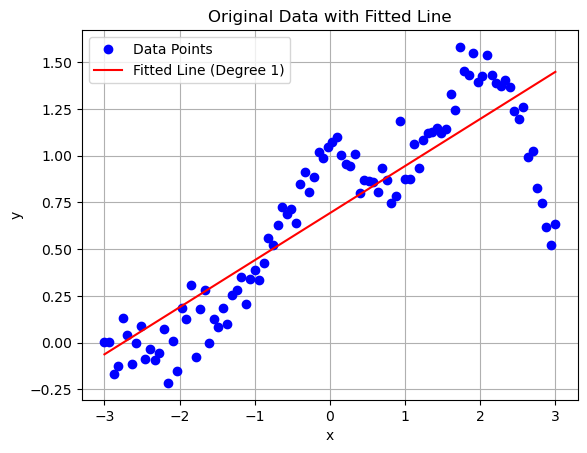

Degrees:  2
OLS training MSE:  0.04837649268903123
OLS test MSE:  0.03780832158234072


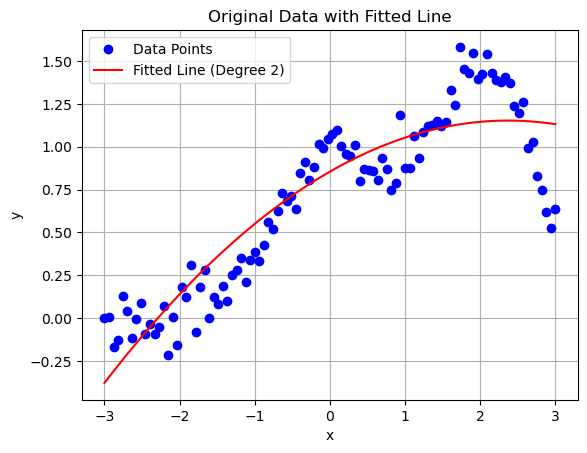

Degrees:  3
OLS training MSE:  0.027149110754885186
OLS test MSE:  0.034714303114469026


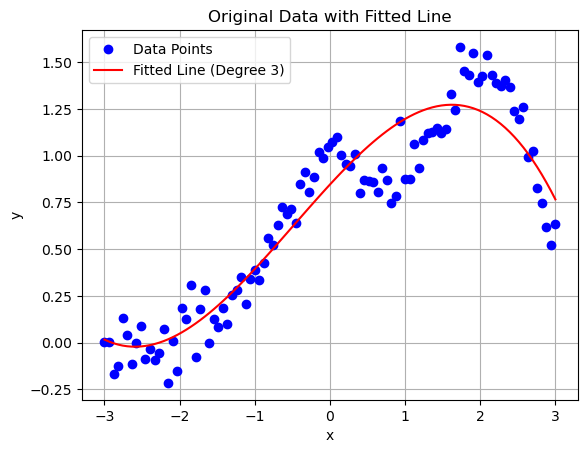

Degrees:  4
OLS training MSE:  0.028520412779581533
OLS test MSE:  0.023250681456274257


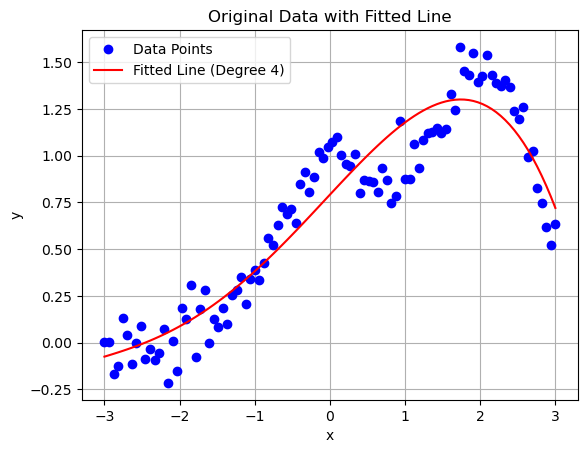

Degrees:  5
OLS training MSE:  0.017879098371117917
OLS test MSE:  0.0256167712358717


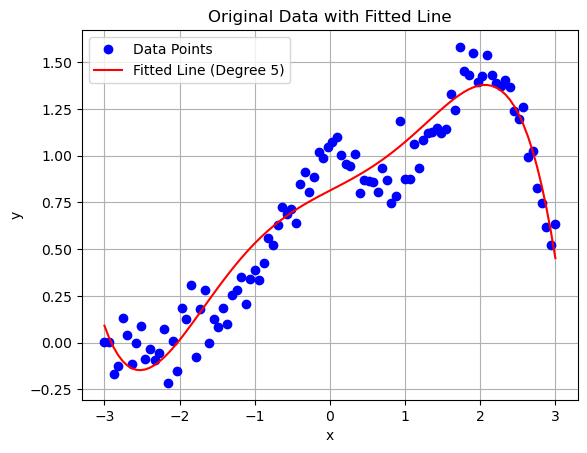

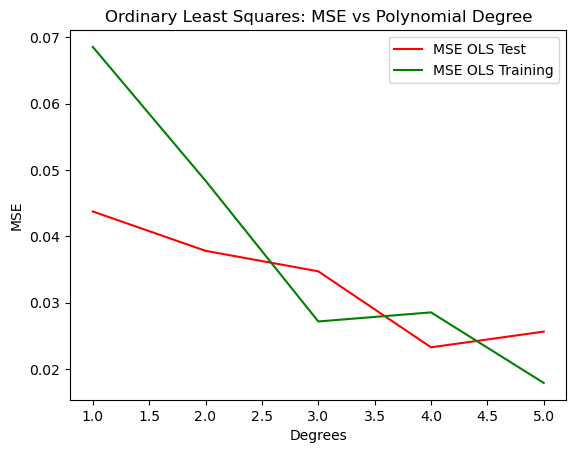

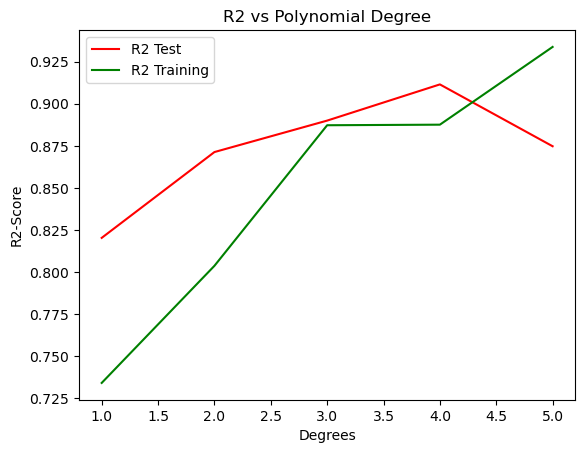

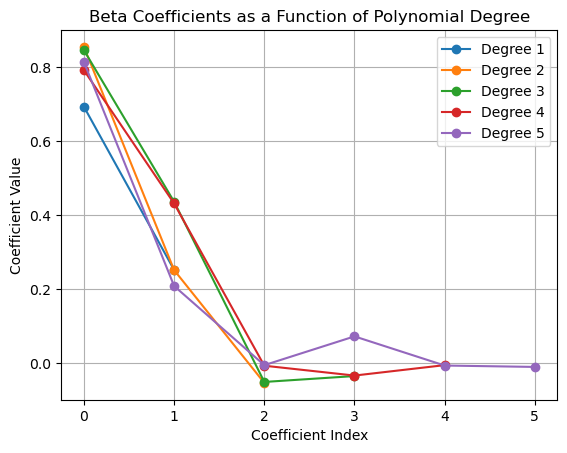

In [109]:
# Scale the data:

#First take a superficial look at the values:
print("y_max: ", y.max())
print("y_min: ", y.min())
y_mean = y.mean()
print("y_mean: ", y.mean())

#Subtract the mean value
y_list = []
for value in y:
    y_list.append(value - y_mean)

y_scaled = np.array(y_list)
#TODO: Look at https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section

print("y_scaled_max: ", y_scaled.max())
print("y_scaled_min: ", y_scaled.min())
print("y_scaled_mean: ", y_scaled.mean())

#Before progressing: Test that code behaves as expected
Simple_test_data.OLS_MSE_works_as_expected()

#Calculate mse and r2 for degrees 1-5
ols_training_mses = []
ols_test_mses = []

betas = []

training_r2s = []
test_r2s = []

degrees = range(1,6)
for order in degrees:
    Simple_test_data.CreateFeatureMatrix(order)
    
    ols_training_mse, ols_test_mse = Simple_test_data.OrdinaryLeastSquaresMSE()
    r2_training, r2_test = Simple_test_data.R2ScoreFunction()
    
    ols_training_mses.append(ols_training_mse)
    ols_test_mses.append(ols_test_mse)

    beta = Simple_test_data.Get_beta()
    betas.append(beta)

    training_r2s.append(r2_training)
    test_r2s.append(r2_test)

    X_train, X_test, y_tilde, y_predict = Simple_test_data.Get_predictions()

    print("Degrees: ", order)
    print("OLS training MSE: ", ols_training_mse)
    print("OLS test MSE: ", ols_test_mse)

    #For testing - plotting the fitted line over the data points:
    Simple_test_data.Create_test_plot(order)

#TODO: Make labels and title better
#Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, ols_test_mses, 'r', label = 'MSE OLS Test')
plt.plot(degrees, ols_training_mses, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Plot the r2 scores vs. degrees
plt.figure()
plt.title("R2 vs Polynomial Degree")
plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
plt.plot(degrees, training_r2s, 'g', label = 'R2 Training')

plt.xlabel('Degrees')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

#From ChatGPT:
#Plot beta vs degrees
for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')

# Adding plot details
plt.title('Beta Coefficients as a Function of Polynomial Degree')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()



### Comment on the above results
For ols beta values, it seems only the first order has a value of 1, after this all values are zero.
The mse value for 1 degree is also the lowest, so makes sense?

# Part b: Adding Ridge Regression to the Franke function
## Write your own code for the ridge method, using either matrix inversion or the singular value decomposition
## Perform same analysis as in a, but now for different values of lambda
SVD: y~​Ridge​=j=0∑p−1​uj​ujT​σj2​+λσj2​​y

Matrix inversion:
βRidge​=(XTX+λI)−1XTy
y~​Ridge​=XβRidge

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# Ridge Regression using matrix inversion
def Beta_ridge_regression(X, y, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(y)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

#Fcn from lecture notes
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#TODO: Write a similar test fcn for ridge. Need to set X = I, and lmb = 0:
#TODO: AND should not just copy the code, but write an actual test, or at least test it in the code itself as for ols
def Lasso_Test():
    X = np.zeros((len(x),Maxpolydegree))
    X[:,0] = 1.0

    for polydegree in range(1,Maxpolydegree):
        X[:,polydegree] = x**(polydegree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    RegLasso = linear_model.Lasso(0, fit_intercept=False)
    RegLasso.fit(X_train, y_train)
    y_tilde_Lasso = RegLasso.predict(X_train)

    ypredictLasso = RegLasso.predict(X_test)
    
    return MSE(y_train, y_tilde_Lasso)

#mse_test = Lasso_Test()
#print(mse_test)

n = 100
n_boostraps = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Maxpolydegree = 5
degrees = range(1,Maxpolydegree+1)
for order in degrees:
    X = np.zeros((len(x),Maxpolydegree))
    X[:,0] = 1.0

    for polydegree in range(1,Maxpolydegree):
        X[:,polydegree] = x**(polydegree)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #TODO: The bootstrap stuff is taken from the lecture notes
    # Combine x transformation and model into one operation.
    # Not neccesary, but convenient.
    model = make_pipeline(PolynomialFeatures(degree=order), LinearRegression(fit_intercept=False))

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred
    # for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(X_train, y_train)

        # Evaluate the new model on the same test data each time.
        y_pred[:, i] = model.fit(x_, y_).predict(X_test).ravel()
    
    # Note: Expectations and variances taken w.r.t. different training
    # data sets, hence the axis=1. Subsequent means are taken across the test data
    # set in order to obtain a total value, but before this we have error/bias/variance
    # calculated per data point in the test set.
    # Note 2: The use of keepdims=True is important in the calculation of bias as this 
    # maintains the column vector form. Dropping this yields very unexpected results.
    bootstrap_error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Error:', bootstrap_error)
    print('Bias^2:', bias)
    print('Var:', variance)
    print('{} >= {} + {} = {}'.format(bootstrap_error, bias, variance, bias+variance))

    plt.plot(x[::5, :], y[::5, :], label='f(x)')
    plt.scatter(X_test, y_test, label='Data points')
    plt.scatter(X_test, np.mean(y_pred, axis=1), label='Pred')
    plt.legend()
    plt.show()

    training_ridge_mses = []
    test_ridge_mses = []
    training_ridge_r2s = []
    test_ridge_r2s = []
    betas_ridge = []

    training_lasso_mses = []
    test_lasso_mses = []
    training_lasso_r2s = []
    test_lasso_r2s = []

    lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
    nlambdas = 100
    lambdas = np.logspace(-4, 4, nlambdas)
    for i in range(nlambdas):
        lmb = lambdas[i]

        #Ridge
        beta_hat_ridge = Beta_ridge_regression(X_train, y_train, lmb)
        betas_ridge.append(beta_hat_ridge)
        y_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
        y_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

        training_ridge_mses.append(error.mean_squared_error(y_train, y_tilde_ridge))
        test_ridge_mses.append(error.mean_squared_error(y_test, y_predict_ridge))

        training_ridge_r2s.append(error.r2_score(y_train, y_tilde_ridge))
        test_ridge_r2s.append(error.r2_score(y_test, y_predict_ridge))

        #Lasso
        RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
        RegLasso.fit(X_train, y_train)
        y_tilde_lasso = RegLasso.predict(X_train)
        y_predict_lasso = RegLasso.predict(X_test)

        training_lasso_mses.append(error.mean_squared_error(y_train, y_tilde_lasso))
        test_lasso_mses.append(error.mean_squared_error(y_test, y_predict_lasso))

        training_lasso_r2s.append(error.r2_score(y_train, y_tilde_lasso))
        test_lasso_r2s.append(error.r2_score(y_test, y_predict_lasso))

    # MSE plots
    plt.figure()
    plt.title("Ridge and Lasso - Mean Square Error - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

    #TODO: Easier to read with same colour for the test and training, or not?
    plt.plot(np.log10(lambdas), test_lasso_mses, 'r--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_mses, 'g--', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # R2 Ridge plots
    plt.figure()
    plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

    plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('R2')
    plt.legend()
    plt.show()

    #TODO: Should there be a similar comparison of beta values depending on lambda?
    #From ChatGPT:
    #Plot beta vs degrees
    # for i in range(len(betas)):
    #     plt.plot(betas[i], marker='o', label=f'Lambdas {lambdas[i]}')

    # # Adding plot details
    # plt.title('Beta Coefficients as a Function of lambda')
    # plt.xlabel('Coefficient Index')
    # plt.ylabel('Coefficient Value')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    
    # Now plot the results
    # plt.figure()
    # plt.plot(np.log10(lambdas), test_ridge_mses, 'r--', label = 'MSE Ridge Train')
    # #plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
    # plt.xlabel('log10(lambda)')
    # plt.ylabel('MSE')
    # plt.legend()
    # plt.show()





    



ValueError: operands could not be broadcast together with shapes (20,) (20,100) 

# Compare and analyse your results with those from part a, with the ordinary least squares method. Study the dependence on lambda

# Part c: Adding Lasso to the Franke function
## Repeat part a and b, but now with Lasso Regression (can use sklearn functions - but note it excludes the intercept by default)

# Give a detailed discussion of the three methods, and a judgement of which method suits the data set

# Part d: Pen and paper part
## Variance and expectation value stuff

# Part e: Bias-variance trade-off and resampling techniques


# First produce a figure similar to fig. 2.11 of Hastie et al (test and training MSEs)
The test MSE can be used to indicate possible regions of high/low bias and variance

-> Also pen and paper, but should be included in the theory section

# Perform a bias-variance analysis of the Franke fcn by studying the MSE value as function of the complexity of your model (degree of poly)

Error: 0.013121574061724262
Bias^2: 0.012073649470245577
Var: 0.0010479245914786816
0.013121574061724262 >= 0.012073649470245577 + 0.0010479245914786816 = 0.013121574061724258


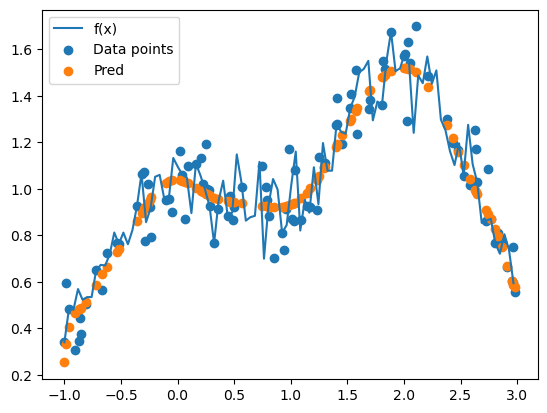

Polynomial degree: 0
Error: 0.32149601703519115
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.32149601703519115 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693412
Bias^2: 0.0796891867672603
Var: 0.004579219539673834
0.08426840630693412 >= 0.0796891867672603 + 0.004579219539673834 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125037
Bias^2: 0.10077114273548984
Var: 0.0032153180657605116
0.10398646080125037 >= 0.10077114273548984 + 0.0032153180657605116 = 0.10398646080125036
Polynomial degree: 3
Error: 0.06547790180152352
Bias^2: 0.062082386342319454
Var: 0.0033955154592040923
0.06547790180152352 >= 0.062082386342319454 + 0.0033955154592040923 = 0.06547790180152355
Polynomial degree: 4
Error: 0.06844519414009445
Bias^2: 0.06453579006728322
Var: 0.003909404072811221
0.06844519414009445 >= 0.06453579006728322 + 0.003909404072811221 = 0.06844519414009444
Polynomial degree: 5
Error: 0.05227921801205679
B

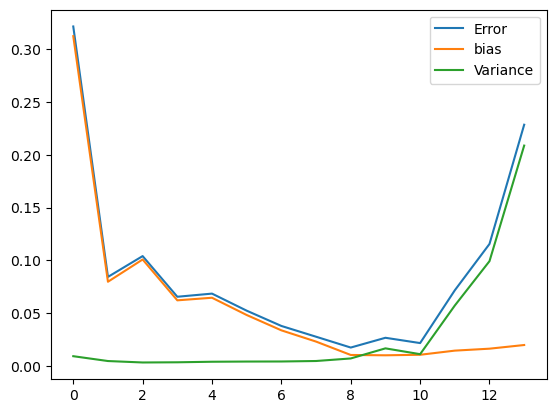

In [39]:
#From lecture notes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()


#Still from lecture notes:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

# Discuss the balance variance trade off as a fcn... and the number of data points, and possibly also training and test data using the bootstrap resampling method

# Part f: Cross-validation as resampling techniques, adding more complexity

# Implement the k-fold cross validation algorithm - may use sklearn - 
# Evaluate again the MSE function resulting from the test folds

# Compare the MSE you get from your cross validation algorithm with the one you got from the bootstrap code. Try 5-10 folds.

# Discuss your results

# In addition to least squares, include also Ridge and Lasso regression

In [ ]:
#From lecture notes:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()


# Part g: Analysis of real data
## Repeat a-f with real data

## Present a critical discussion of the results, discussing the applicability of these regression methods to the type of data used here

## Include link to github repo? With a folder for results/plots?